In [1]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio import imread, imsave
from numpy.random import randint
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diffusion algorithm found in 10.1 for black and white images.
Run the function on balloon.jpg. Show the original image and the diffused image for σ = .1,
λ = .25, N = 5, 20, 100.

In [2]:
def anisdiff_bw(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    #begin the iterations
    m,n = np.shape(U)
    for i in range(N):
        #create padded matrix
        U_pad = np.zeros((m+2, n+2))
        U_pad[1:-1,1:-1] = U
        #top edge
        U_pad[0,1:-1]=U[0,:]
        #bottom edge
        U_pad[-1,1:-1]=U[-1,:]
        #right edge
        U_pad[1:-1,0]=U[:,0]
        U_pad[1:-1,-1]=U[:,-1]
        #now the update steps
        one = U_pad[1:-1,:-2] - U 
        two = U_pad[1:-1,2:] - U
        three = U_pad[:-2,1:-1] - U
        four = U_pad[2:,1:-1] - U
        inside = (g(np.absolute(one))*one+g(np.absolute(two))*two+
            g(np.absolute(three))*three+g(np.absolute(four))*four)
        U = U + lambda_*(inside)
    return U

#### Tests

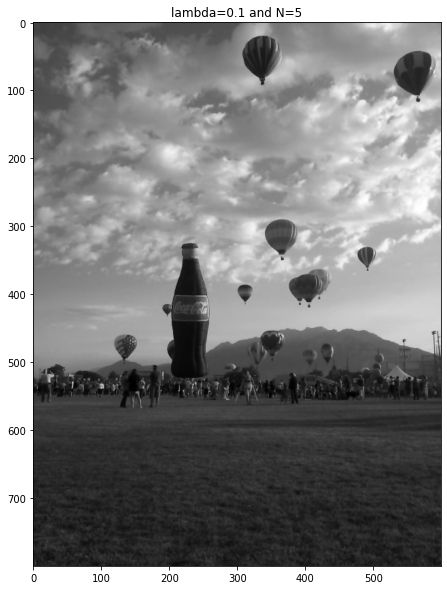

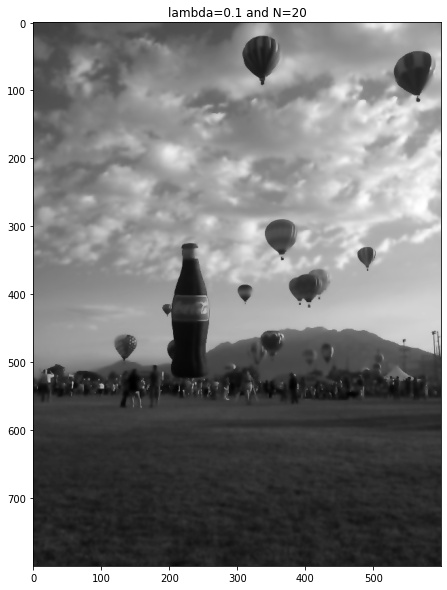

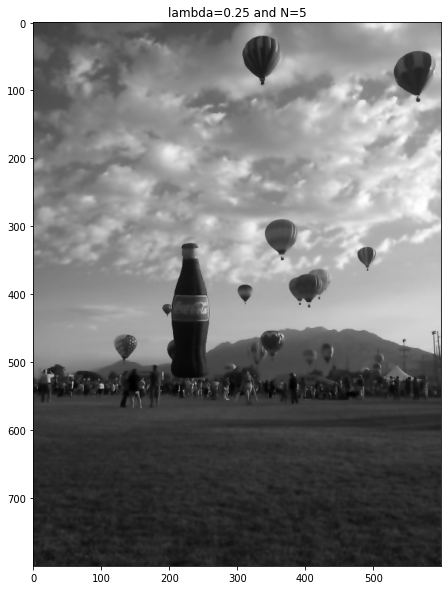

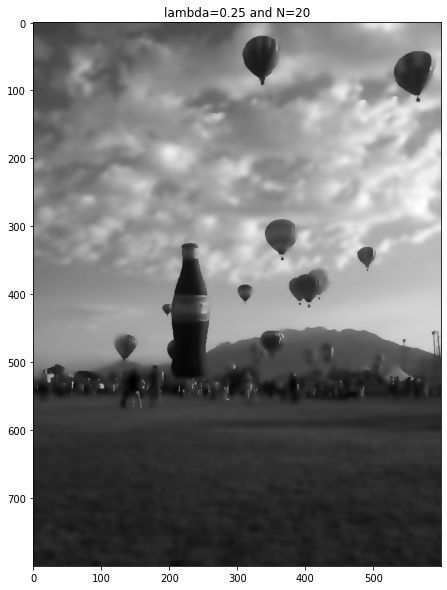

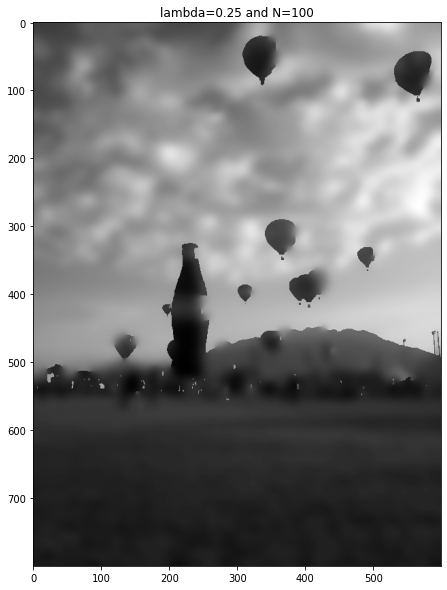

In [3]:
#define g
def g(pic_array):
    return_array = np.exp(-np.square(pic_array/0.1))
    return return_array
#define values to loop through
lambda_list = [0.1,0.25]
N_list = [5,20,100]
picture_1 = imread('balloon.jpg', as_gray=True) * 1./255
plt.imshow(picture_1, cmap=cm.gray)
plt.title("Original Image")
plt.show()
#loop through the values
for lambda_ in lambda_list:
    for N in N_list:
        plt.clf()
        new_pic = anisdiff_bw(picture_1, N, lambda_, g)
        plt.imshow(new_pic, cmap=cm.gray)
        plt.title('lambda={} and N={}'.format(lambda_, N))
        plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diffused image for
σ = .1, λ = .25, N = 5, 20, 100.

In [4]:
def anisdiff_color(U, N, lambda_, sigma):
    """ Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. """
    #function to compute the 2-norm
    def norm(A):
        return np.sqrt(np.sum(A**2,axis=2,keepdims=True))
    #begin the iterations
    m,n,l = np.shape(U)
    for i in range(N):
        #create padded matrix
        U_pad = np.zeros((m+2, n+2, l))
        U_pad[1:-1,1:-1,:] = U
        #top edge
        U_pad[0,1:-1,:]=U[0,:,:]
        #bottom edge
        U_pad[-1,1:-1,:]=U[-1,:,:]
        #right edge
        U_pad[1:-1,0,:]=U[:,0,:]
        U_pad[1:-1,-1,:]=U[:,-1,:]
        #now the update steps
        one = U_pad[1:-1,:-2,:] - U 
        two = U_pad[1:-1,2:,:] - U
        three = U_pad[:-2,1:-1,:] - U
        four = U_pad[2:,1:-1,:] - U
        inside = (g(norm(one))*one+g(norm(two))*two+
            g(norm(three))*three+g(norm(four))*four)
        U = U + lambda_*(inside)
    return U

#### Tests

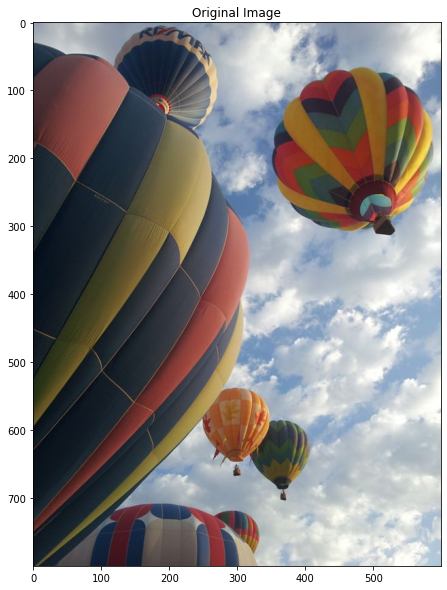

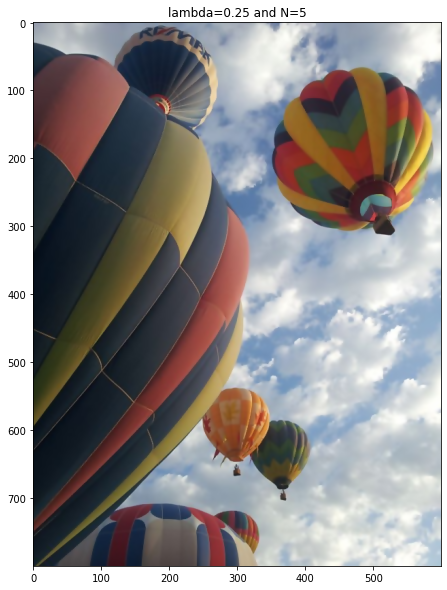

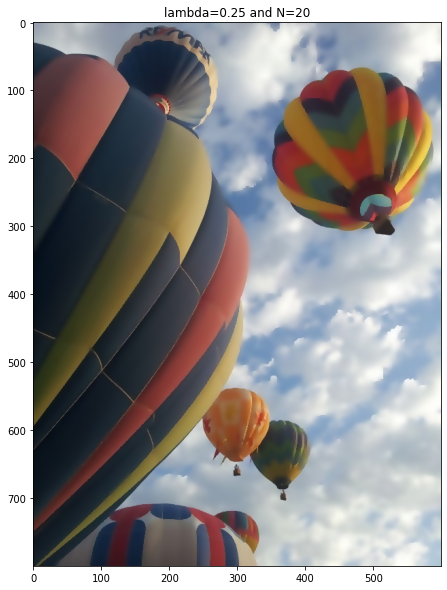

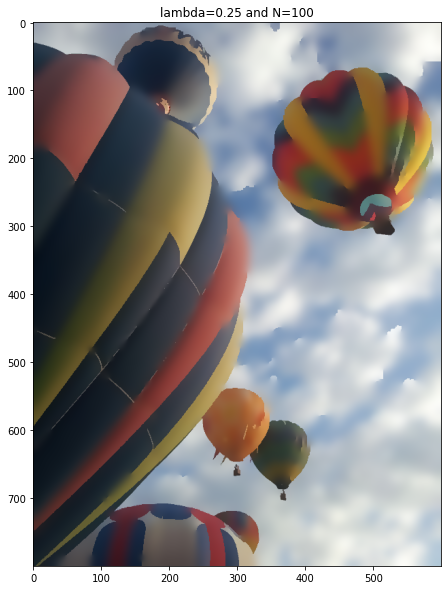

In [5]:
#define g
def g(pic_array):
    return_array = np.exp(-np.square(pic_array/0.1))
    return return_array
#define values to loop through
lambda_list = [0.25]
N_list = [5,20,100]
picture_1 = imread('balloons_color.jpg')*1./255
plt.imshow(picture_1, cmap=cm.gray)
plt.title("Original Image")
plt.show()
#loop through the values
for lambda_ in lambda_list:
    for N in N_list:
        plt.clf()
        new_pic = anisdiff_color(picture_1, N, lambda_, g)
        plt.imshow(new_pic, cmap=cm.gray)
        plt.title('lambda={} and N={}'.format(lambda_, N))
        plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diffusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

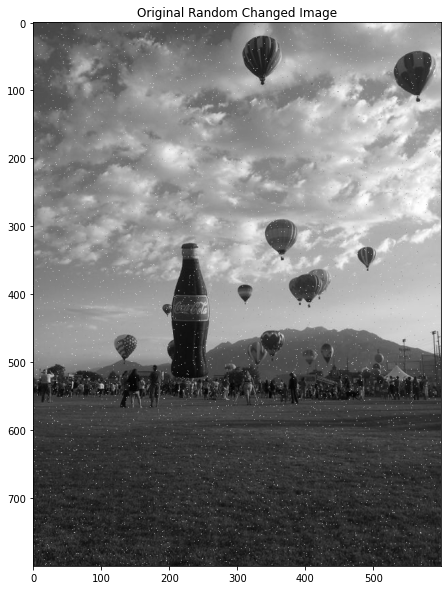

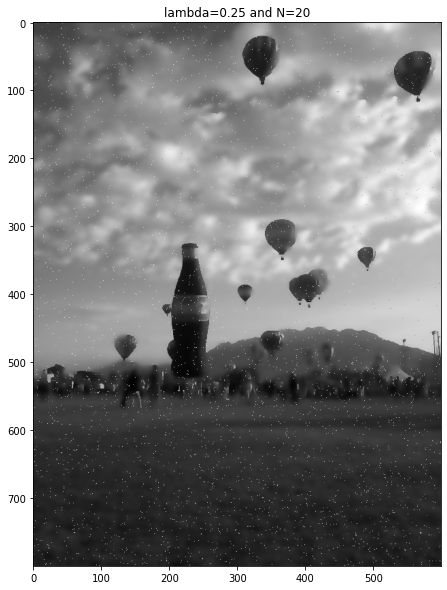

In [6]:
#define g
def g(pic_array):
    return_array = np.exp(-np.square(pic_array/0.1))
    return return_array
#now get the image
image = imread('balloon.jpg', as_gray=True)
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = 127 + randint(127)
#set the constants
lambda_=0.25
N=20
image = image*1./255
plt.imshow(image, cmap=cm.gray)
plt.title("Original Random Changed Image")
plt.show()
#edit the image
new_image = anisdiff_bw(image,N,lambda_,g)
plt.clf()
plt.imshow(new_image, cmap=cm.gray)
plt.title('lambda={} and N={}'.format(lambda_, N))
plt.show()

#### According to the explanations, anistropic diffusion is used to preserve distinct features and lines in an image and remove the unnecessary noise. Adding the random noise adds distinct pixels in the image, so these distinct pixels are preserved through the iterations

# Problem 4 (Optional)

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [10]:
#function to calculate the 2-norm
def norm(A):
    return np.sqrt(np.sum(A**2,axis=2,keepdims=True))

#function to be used for updating problem 4
def pad_matrix(A):
    m,n,l = np.shape(A)
     #create padded matrix
    A_pad = np.zeros((m+2, n+2, l))
    A_pad[1:-1,1:-1,:] = A
    #top edge
    A_pad[0,1:-1,:]=A[0,:,:]
    #bottom edge
    A_pad[-1,1:-1,:]=A[-1,:,:]
    #right edge
    A_pad[1:-1,0,:]=A[:,0,:]
    A_pad[1:-1,-1,:]=A[:,-1,:]
    return A_pad

def anisdiff_min(U, N, lambda_, g):
    """ Run the Anisotropic Diffusion minimizing scheme on a
        colored image
    """
    #begin the iterations
    m,n,l = np.shape(U)
    for i in range(N):
        if (i%10 == 0):
            print(i)
        #create padded matrix
        U_pad = pad_matrix(U)
        #now the update steps
        one = U_pad[1:-1,:-2,:] - U 
        two = U_pad[1:-1,2:,:] - U
        three = U_pad[:-2,1:-1,:] - U
        four = U_pad[2:,1:-1,:] - U
        #now pad the resulting matrices
        one_pad = pad_matrix(one)
        two_pad = pad_matrix(two)
        three_pad = pad_matrix(three)
        four_pad = pad_matrix(four)
        inside = (g(norm(one_pad))*one+g(norm(two_pad))*two+
            g(norm(three_pad))*three+g(norm(four_pad))*four)
        U = U + lambda_*(inside)
    return U

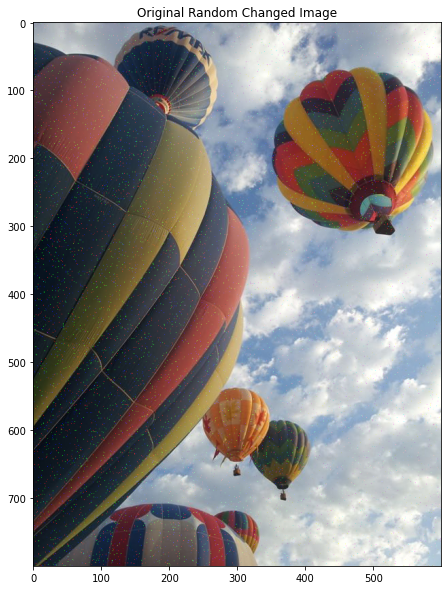

0
10
20
30
40


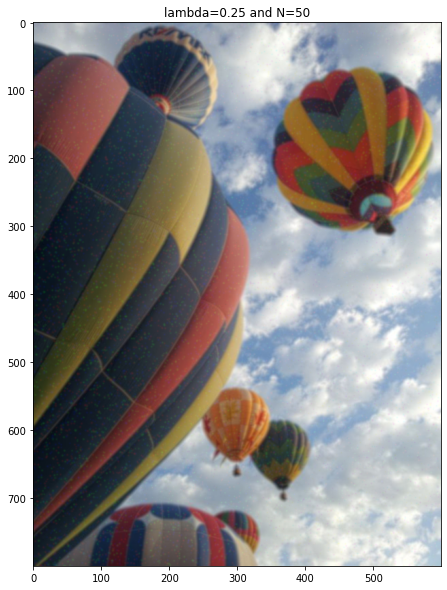

In [11]:
def g_1(image):
    m,n,l = np.shape(image)
    image_new = np.zeros((m-2,n-2,l))
    for row in range(1,m-1):
        for col in range(1,n-1):
            region = image[row-1:row+2,col-1:col+2,:]
            sum_reg = np.sum(np.sum(region,axis=1),axis=0)-image[row,col,:]
            image_new[row-1,col-1,:] = sum_reg/8
    return image_new
#set the values to be used
lambda_=0.25
image = imread('balloons_color.jpg')
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//100):
        # Assign a random value to a random place
        image[randint(x),randint(y),dim] = 127 + randint(127)
#get the images and plot it
N=50
image = image*1./255
plt.imshow(image, cmap=cm.gray)
plt.title("Original Random Changed Image")
plt.show()
#edit the image
new_image = anisdiff_min(image,N,lambda_,g_1)
plt.clf()
plt.imshow(new_image, cmap=cm.gray)
plt.title('lambda={} and N={}'.format(lambda_, N))
plt.show()

### This is only after 50 iterations. Mine takes a long time to run, so it was not really realistic to run 300 iterations.